In [74]:
#Imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import plotly.express as px
import panel as pn

In [76]:
# Load .env enviroment variables
load_dotenv()

# Set up Panel Plotly extension
pn.extension('plotly')

In [44]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [69]:
#Get stock data
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-19", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["TQQQ"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker.iloc[:,4]

C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:18: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead


time
2020-05-01 00:00:00-04:00    41190966
2020-05-04 00:00:00-04:00    46860568
2020-05-05 00:00:00-04:00    34715149
2020-05-06 00:00:00-04:00    75041364
2020-05-07 00:00:00-04:00    34609163
                               ...   
2022-01-12 00:00:00-05:00    66713757
2022-01-13 00:00:00-05:00    84112566
2022-01-14 00:00:00-05:00    85664416
2022-01-18 00:00:00-05:00    73677344
2022-01-19 00:00:00-05:00    87716264
Name: (TQQQ, volume), Length: 434, dtype: int64

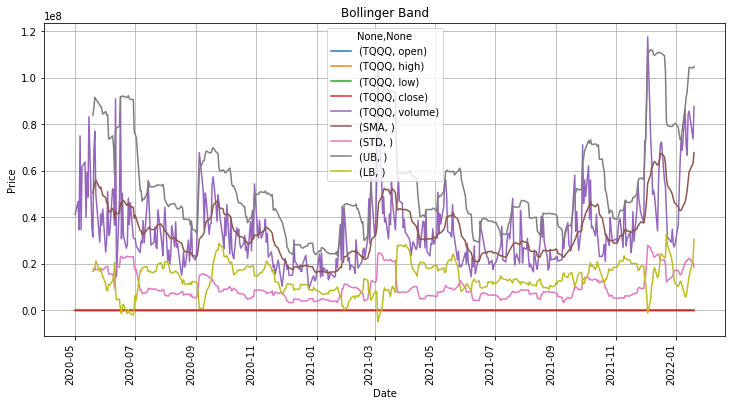

TQQQ                                       \
                             open     high     low     close    volume   
time                                                                     
2022-01-12 00:00:00-05:00  153.91  155.930  149.88  152.6305  66713757   
2022-01-13 00:00:00-05:00   77.13   77.550   70.02   70.6000  84112566   
2022-01-14 00:00:00-05:00   69.09   72.065   69.00   71.9100  85733795   
2022-01-18 00:00:00-05:00   68.50   69.720   66.06   66.6400  73677344   
2022-01-19 00:00:00-05:00   67.31   68.710   64.16   64.3384  87716264   

                                    SMA           STD            UB  \
                                                                      
time                                                                  
2022-01-12 00:00:00-05:00  5.145482e+07  2.125956e+07  9.397394e+07   
2022-01-13 00:00:00-05:00  5.567345e+07  2.192154e+07  9.951653e+07   
2022-01-14 00:00:00-05:00  5.957852e+07  2.242815e+07  1.044348e+08   
2022-01-18 00:00:00-05:00  6.308389e+07  2.058493e+07  1.042538e+08   
2022-01-19 00:00:00-05:00  6.773355e+07  1.854721e+07  1.048280e+08   

                                     LB  
                                         
time                                     
2022-01-12 00:00:00-05:00  8.935701e+06  
2022-01-13 00:00:00-05:00  1.183037e+07  
2022-01-14 00:00:00-05:00  1.472223e+07  
2022-01-18 00:00:00-05:00  2.191403e+07  
2022-01-19 00:00:00-05:00  3.063913e+07

In [80]:
#Calculate Bollinger Bands
#df['SMA']=df['close'].rolling(window=13).mean()
#df['STD']=df['close'].rolling(window=13).std()
df['SMA']=df_ticker.iloc[:,4].rolling(window=13).mean()
df['STD']=df_ticker.iloc[:,4].rolling(window=13).std()

df['UB']=df['SMA']+(df['STD']*2)
df['LB']=df['SMA']-(df['STD']*2)
#cl=['Close', 'SMA', 'UB', 'LB']
df.plot(figsize=(12.2,6.4))
plt.title('Bollinger Band')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
df.tail()

C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional in

NameError: name 'plt2' is not defined

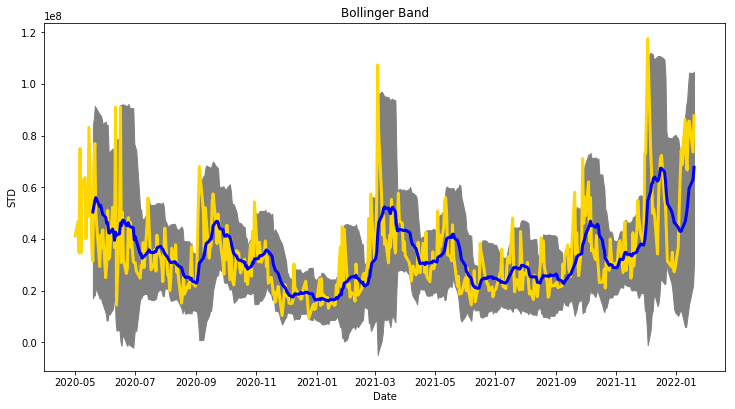

In [79]:
#Ploting bollinger band

fig1=plt.figure(figsize=(12.2,6.4))
ax=fig1.add_subplot(1,1,1)
x_axis=df.index
ax.fill_between(x_axis, df['UB'], df['LB'], color='grey')
ax.plot(x_axis, df_ticker.iloc[:,4], color='gold', lw=3, label='close price')
ax.plot(x_axis, df['SMA'], color='blue', lw=3, label='SMA')
ax.set_title('Bollinger Band')
ax.set_xlabel('Date')
ax.set_ylabel('STD')
plt2.xticks(rotation=90)
ax.legend()
plt2.show()

In [72]:
# Define RSI function

def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df_ticker.iloc[:,4].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

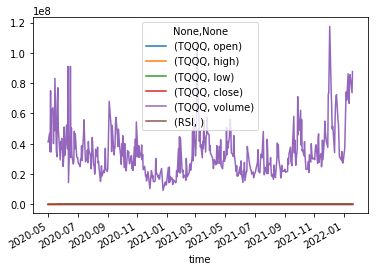

In [73]:
df_ticker['RSI'] = rsi(df_ticker)
df_ticker['RSI'].dropna().head(20)
df_ticker.plot()

In [82]:
plt.show()